In [12]:
# Some necessary imports
import numpy as np

from ikpy.chain import Chain
from ikpy.utils import plot

# Optional: support for 3D plotting in the NB
%matplotlib widget
# %matplotlib inline
# turn this off, if you don't need it

7


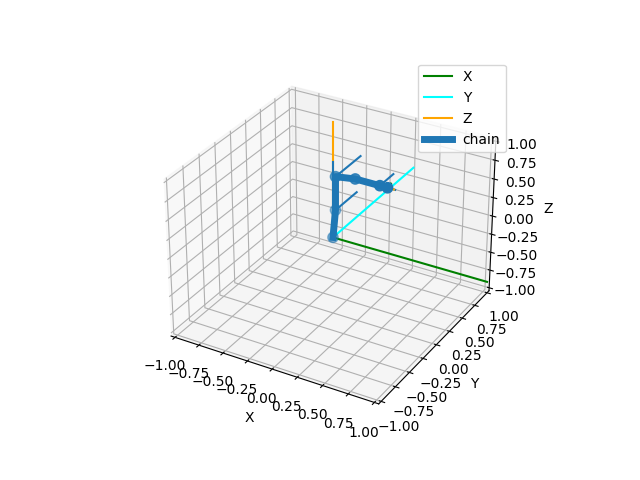

In [21]:
DRV_chain = Chain.from_urdf_file("../resources/DRV90.urdf")
# DRV_chain = Chain.from_urdf_file("../resources/DRV90ASS_test.urdf")

print(len(DRV_chain))
# Let's how it looks without kinematics first
from mpl_toolkits.mplot3d import Axes3D;
fig, ax = plot.init_3d_figure();
DRV_chain.plot([0] * (len(DRV_chain)), ax)
ax.legend()

In [14]:
real_frame_end = DRV_chain.forward_kinematics([0] * (len(DRV_chain)), full_kinematics=False)
real_frame_J = DRV_chain.forward_kinematics([0] * (len(DRV_chain)), full_kinematics=True)
# t = [0]
# print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], t))
num = 6
print(real_frame_J[num])
print(real_frame_end)
print(real_frame_J[num]==real_frame_end)


[[ 1.60960365e-05  3.28123768e-06  1.00000000e+00  5.34001763e-01]
 [ 9.65731281e-01 -2.59544008e-01 -1.46928204e-05 -7.80925348e-06]
 [ 2.59544008e-01  9.65731281e-01 -7.34642370e-06  8.53996975e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.60960365e-05  3.28123768e-06  1.00000000e+00  5.34001763e-01]
 [ 9.65731281e-01 -2.59544008e-01 -1.46928204e-05 -7.80925348e-06]
 [ 2.59544008e-01  9.65731281e-01 -7.34642370e-06  8.53996975e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [28]:

# target_position = [0.25, 0, 0.45]
target_position = [0.32, -0.47, 0.15]
target_orientation = [0, 0, -1]

ik = DRV_chain.inverse_kinematics(target_position, 
                                  target_orientation, 
                                  orientation_mode="Z")
# print(ik)
print(ik[-2] <= 0)
list(ik * 180.0 / np.pi)
# ik = DRV_chain.inverse_kinematics(target_position)

fig, ax = plot.init_3d_figure();
DRV_chain.plot(ik, ax)
ax.legend()

False


[0.0,
 -55.75105538938911,
 55.69685413083281,
 15.204760776534558,
 0.000379313395195357,
 19.0979644074757,
 0.0]

In [19]:
list(ik * 180.0 / np.pi)

[0.0,
 -47.563054385583925,
 51.479026429761525,
 29.86798183411881,
 0.0004320924867643466,
 8.652570818554446,
 0.0]

In [5]:
def get_chain_bounds(chain):
    links_bounds_angle = []
    for i in range(len(chain)):
        links_bounds_angle.append(np.asarray(chain.links[i].bounds) * 180.0 / np.pi)

    return links_bounds_angle


links_bounds_angle = get_chain_bounds(DRV_chain)
links_bounds_angle

[array([-inf,  inf]),
 array([-170.00230739,  170.00230739]),
 array([-105.00024554,  135.00031569]),
 array([-204.99856952,   60.00014031]),
 array([-189.99853444,  189.99853444]),
 array([-120.00028061,  120.00028061]),
 array([-360.00084184,  360.00084184])]

In [6]:
a = 360 * np.pi / 180

a / np.pi 

2.0

In [7]:
def check_ik_in_boundarys(bounds, ik):
    """
    bounds and ik should be same type (angle or radian)
    """
    is_ok = True
    assert len(bounds) == len(ik), "len(bounds) should == len(ik)"
    for i, bound in enumerate(bounds):
        # print(bound)
        if bound[0] < ik[i] < bound[1]:
            print(i, "ok")
        else:
            print(i, "no")
            is_ok = False
            break
    return is_ok





links_bounds_angle

ik = [0, 170, 135, 61, 0, 0, 0]

check_ik_in_boundarys(links_bounds_angle, ik)


0 ok
1 ok
2 ok
3 no


False

In [8]:
3<4<5

True

In [9]:
np.asarray(DRV_chain.links[1].bounds) * 2


array([-5.9342,  5.9342])

In [10]:
a = [100, 200, 300]
for i in enumerate(a):
    print(i)

(0, 100)
(1, 200)
(2, 300)


In [11]:
b = np.asarray((-180, 180))
b+ 5

array([-175,  185])

In [12]:
def restrict_bound(bound, num):
    result = [None, None]
    result[0] = bound[0] + num
    result[1] = bound[1] - num

    return result


restrict_bound(b, 5)

[-175, 175]